# Econometria Aplicada

## Aula 5 - Modelos com dados em painel
---



**Motivação**: 

 Qual a relação entre o investimento das empresas com o seu estoque de capital e o valor de mercado das mesmas? \
 Esta aplicação foi inspirada no tutorial ["R Tutorial: Panel Data Analysis 1"](https://rpubs.com/phle/r_tutorial_panel_data_analysis) e utiliza dados de Grunfeld (1958).
 
 *Grunfeld, Y. (1958). The Determinants of Corporate Investment. Unpublished Ph.D. Dissertation, University of Chicago*

### **Pacotes**

In [1]:
 install.packages("plm") # pacote para estimar modelos com dados em painel

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘miscTools’, ‘rbibutils’, ‘bdsmatrix’, ‘collapse’, ‘zoo’, ‘sandwich’, ‘lmtest’, ‘maxLik’, ‘Rdpack’, ‘Formula’




In [2]:
library(plm) 

In [11]:
library(ggplot2)

In [ ]:
install.packages("broom")

In [ ]:
library(broom)

### **Dados**

In [3]:
data("Grunfeld", package="plm")

Veja os primeiros 30 elementos da base de dados:

In [5]:
head(Grunfeld, 30)

,firm,year,inv,value,capital
,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,1935,317.6,3078.5,2.8
2,1,1936,391.8,4661.7,52.6
3,1,1937,410.6,5387.1,156.9
4,1,1938,257.7,2792.2,209.2
5,1,1939,330.8,4313.2,203.4
6,1,1940,461.2,4643.9,207.2
7,1,1941,512.0,4551.2,255.2
8,1,1942,448.0,3244.1,303.7
9,1,1943,499.6,4053.7,264.1


Veja a estrutura dos dados:

In [6]:
str(Grunfeld)

'data.frame':	200 obs. of  5 variables:
 $ firm   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ year   : int  1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 ...
 $ inv    : num  318 392 411 258 331 ...
 $ value  : num  3078 4662 5387 2792 4313 ...
 $ capital: num  2.8 52.6 156.9 209.2 203.4 ...


#### **Variáveis**:

* **inv**: "Gross investment, defined as additions to plant and equipment plus maintenance and repairs in millions of dollars deflated by the implicit price deflator of producers’ durable equipment (base 1947)."
* **value**: "Market value of the firm, defined as the price of common shares at December 31 (or, for WH, IBM and CH, the average price of December 31 and January 31 of the following year) times the number of common shares outstanding plus price of preferred shares at December 31 (or average price of December 31 and January 31 of the following year) times number of preferred shares plus total book value of debt at December 31 in millions of dollars deflated by the implicit GNP price deflator (base 1947)."
* **capital**: "Stock of plant and equipment, defined as the accumulated sum of net additions to plant and equipment deflated by the implicit price deflator for producers’ durable equipment (base 1947) minus depreciation allowance deflated by depreciation expense deflator (10 years moving average of wholesale price index of metals and metal products, base 1947)."
* **firm**: "factor with 11 levels: "General Motors", "US Steel", "General Electric", "Chrysler", "Atlantic Refining", "IBM", "Union Oil", "Westinghouse", "Goodyear", "Diamond Match", "American Steel"."
* **year**: "Year."

*Fonte: https://cran.radicaldevelop.com/web/packages/AER/AER.pdf*

## Visualização dos dados

Faça um gráfico de dispersão entre o investimento e o estoque de capital

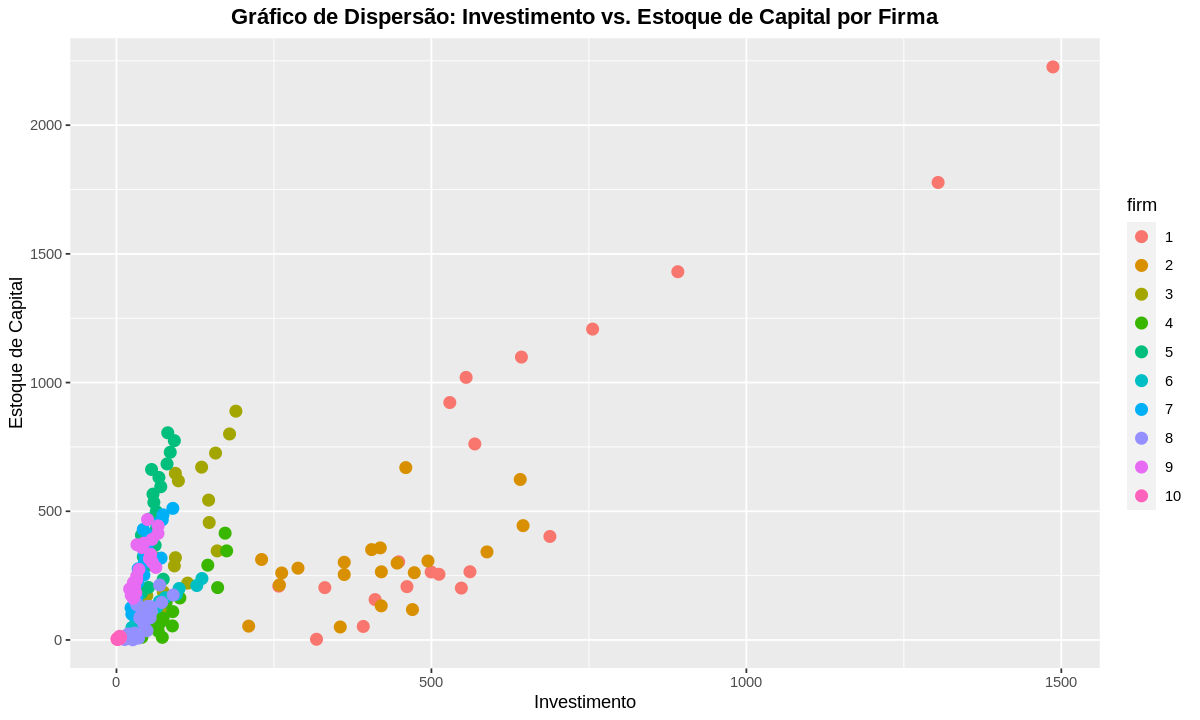

In [43]:
# Definir tamanho personalizado
largura <- 10  # largura do gráfico em polegadas
altura <- 6    # altura do gráfico em polegadas

# Gráfico de dispersão com cores diferentes para cada firma
scatter_plot <- ggplot(Grunfeld, aes(x = inv, y = capital, color = firm)) +
  geom_point(size = 3) +
  xlab("Investimento") +
  ylab("Estoque de Capital") +
  ggtitle("Gráfico de Dispersão: Investimento vs. Estoque de Capital por Firma") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5))

# Ajustar o tamanho do gráfico de dispersão no Google Colab
options(repr.plot.width = largura, repr.plot.height = altura)
scatter_plot

Faça um gráfico do investimento por empresa ao longo do tempo:

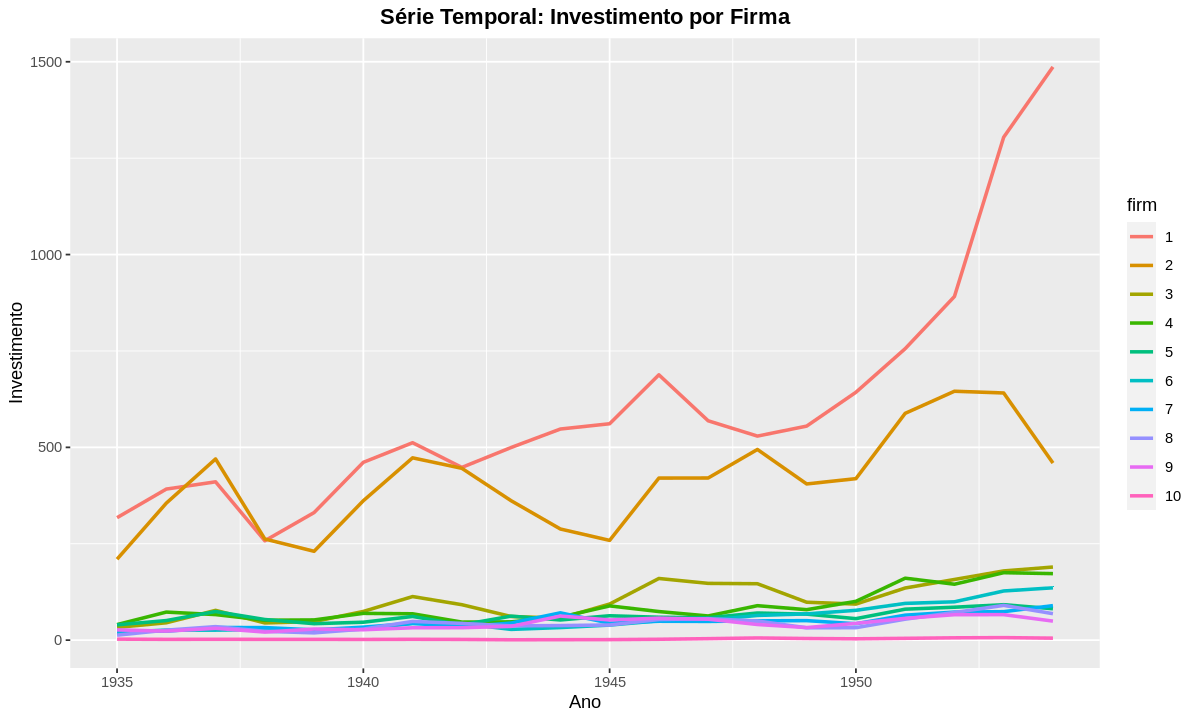

In [44]:
# Definir tamanho personalizado
largura <- 10  # largura do gráfico em polegadas
altura <- 6    # altura do gráfico em polegadas

# Gráfico de série temporal para cada firma com tamanho personalizado
line <- ggplot(Grunfeld, aes(x = year, y = inv, color = firm)) +
  geom_line(size = 1) +
  xlab("Ano") +
  ylab("Investimento") +
  ggtitle("Série Temporal: Investimento por Firma") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5))

# Ajustar o tamanho do gráfico no Google Colab
options(repr.plot.width = largura, repr.plot.height = altura)
line

## Modelo de regressão linear

Vamos estimar a regressão abaixo:

\begin{equation}
\text{ inv}_i = \beta_0 + \beta_1 * \text{ capital}_i + \beta_2 * \text{ value}_i + \epsilon_i
\end{equation}



In [32]:
mqo <- lm( inv ~ capital + value, data = Grunfeld)

In [33]:
summary(mqo)


Call:
lm(formula = inv ~ capital + value, data = Grunfeld)

Residuals:
    Min      1Q  Median      3Q     Max 
-291.68  -30.01    5.30   34.83  369.45 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -42.714369   9.511676  -4.491 1.21e-05 ***
capital       0.230678   0.025476   9.055  < 2e-16 ***
value         0.115562   0.005836  19.803  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 94.41 on 197 degrees of freedom
Multiple R-squared:  0.8124,	Adjusted R-squared:  0.8105 
F-statistic: 426.6 on 2 and 197 DF,  p-value: < 2.2e-16


In [39]:
print ( tidy( mqo ) )

# A tibble: 3 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)  -42.7     9.51        -4.49 1.21e- 5
2 capital        0.231   0.0255       9.05 1.35e-16
3 value          0.116   0.00584     19.8  9.54e-49


Alternativa com o pacote 'plm':

In [34]:
pooled_ols_plm <- plm(inv ~ capital + value, data = Grunfeld, 
                      index = c("firm", "year"), 
                      effect = "individual", model = "pooling")

In [40]:
summary(pooled_ols_plm)

Pooling Model

Call:
plm(formula = inv ~ capital + value, data = Grunfeld, effect = "individual", 
    model = "pooling", index = c("firm", "year"))

Balanced Panel: n = 10, T = 20, N = 200

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-291.6757  -30.0137    5.3033   34.8293  369.4464 

Coefficients:
               Estimate  Std. Error t-value  Pr(>|t|)    
(Intercept) -42.7143694   9.5116760 -4.4907 1.207e-05 ***
capital       0.2306785   0.0254758  9.0548 < 2.2e-16 ***
value         0.1155622   0.0058357 19.8026 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    9359900
Residual Sum of Squares: 1755900
R-Squared:      0.81241
Adj. R-Squared: 0.8105
F-statistic: 426.576 on 2 and 197 DF, p-value: < 2.22e-16

In [41]:
print(tidy( pooled_ols_plm ))

# A tibble: 3 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)  -42.7     9.51        -4.49 1.21e- 5
2 capital        0.231   0.0255       9.05 1.35e-16
3 value          0.116   0.00584     19.8  9.54e-49


Mas como sabemos que as mesmas firmas são acompanhadas ao longo do tempo, precisamos ajustar a matriz de variância-covariância para qualquer inferência sobre os coeficientes:

In [ ]:
vcov_cluster <- vcovHC(pooled_ols_plm, cluster = "group")

In [ ]:
pooled_ols_plm$vcov <- vcov_cluster

In [ ]:
results <- tidy( pooled_ols_plm )

In [ ]:
print( results )

Qual é a conclusão que obtemos?

### Teste para componentes não-observáveis

Teste Breusch-Pagan:

$\mathcal{H}_0: \sigma^2_u = 0$ \\
$\mathcal{H}_a: \sigma^2_u \neq 0$ \\

In [ ]:
plmtest( pooled_ols_plm, effect = "individual", 
         type = c("bp")  # Teste Breusch-Pagan                   
         )

Qual é a conclusão?

## Efeitos Fixos

#### Least Squares Dummy Variable

Vamos estimar a regressão abaixo:

\begin{equation}
\text{ inv}_{i,t} = \beta_0 + \beta_1 * \text{ capital}_{i,t} + \beta_2 * \text{ value}_{i,t} + u_i + \epsilon_i
\end{equation}

Primeiro, vamos estimar uma regressão com a função 'lm', mas vamos adicionar à regressão a expressão 'factor(firm)'

Vamos repetir a regressão, mas vamos adicionar '-1' à regressão para removermos o intercepto:

### Estimador de efeitos fixos

Vamos estimar o modelo com efeitos fixos, considerando a estrutura de dados em painel. Para isso, vamos utilizar a função 'plm' (como fizemos acima no caso do "pooled OLS", mas agora chamaremos o modelo de 'within': Após a estimativa, utilize o comando 'summary' para obter os resultados.

Vamos testar se a adição de um componente sistemático gera efeitos significativos:

In [ ]:
pFtest( fe_model_plm, pooled_ols_plm ) #o primeiro deve ser o modelo com efeitos fixos e o segundo o pooled OLS

### Efeitos aleatórios

Vamos estimar o modelo com efeitos aleatórios, considerando a estrutura de dados em painel. Para isso, vamos utilizar a função 'plm' (como fizemos acima, tanto no caso do "pooled OLS", como com os "efeitos fixos", mas agora chamaremos o modelo de 'random': Após a estimativa, utilize o comando 'summary' para obter os resultados.

Efeitos fixos ou aleatórios?

Teste de Hausman:

$\mathcal{H}_0: \rho \big(u, \epsilon \big) = 0$ \\
$\mathcal{H}_a: \rho \big(u, \epsilon \big) \neq 0$ \\

In [ ]:
phtest( fe_model_plm, re_model_plm )

O que podemos concluir?